In [149]:
import numpy as np
import pandas

In [150]:
### Constants
AIR_DENSITY     = 1.225         * 1e0   # kg/m**3
AIR_VISCOSITY   = 1.7894e-5     * 1e0   # kg/m/s  or Pa*s (Dynamic)


In [151]:
### Config
MEAN_CHORD      = 200           * 1e-3  # mm
WINGSPAN        = 1200          * 1e-3  # mm


In [152]:
alpha,reynolds,cl,cd,cm = np.load("tkv2008.npy",allow_pickle=True)

In [153]:
velocity = AIR_VISCOSITY * reynolds / AIR_DENSITY / MEAN_CHORD

In [156]:
l = AIR_DENSITY * velocity**2 * MEAN_CHORD * cl / 2
d = AIR_DENSITY * velocity**2 * MEAN_CHORD * cd / 2
m = AIR_DENSITY * velocity**2 * MEAN_CHORD**2 * cm / 2

Check variations in air viscosity and density
array reynolds x alpha


In [ ]:
l[:,-1]

In [208]:
from matplotlib import pyplot as plt, cm

In [167]:
reynolds[8]

273000.0

In [ ]:
l[:,reynolds == reynolds[8]]

In [ ]:
for i,rey in enumerate(reynolds):
    print(i,rey)

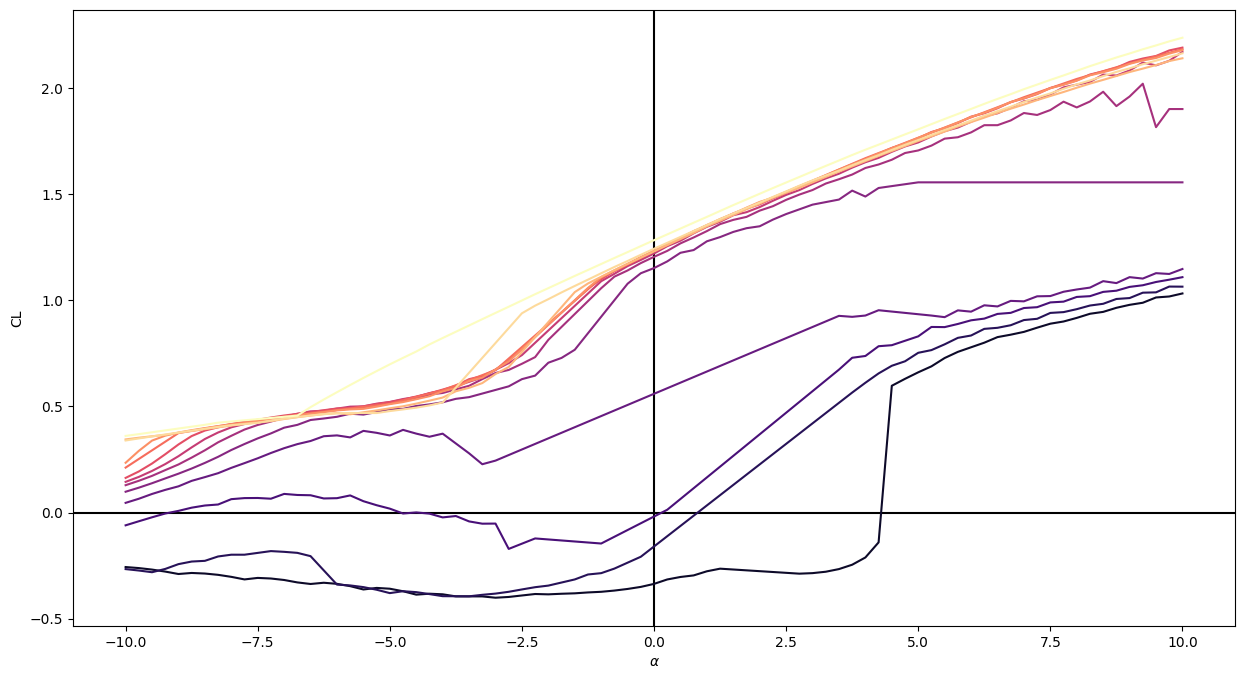

In [218]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.set_ylabel("CL")
ax.set_xlabel("$\\alpha$")
ax.axvline(color='black')
ax.axhline(color='black')
for i,rey in enumerate(reynolds):
    ax.plot(alpha,cl[:,i],color=cm.magma((i+1)/(len(reynolds))))